<a href="https://colab.research.google.com/github/smaranjitghose/PyPassCheck/blob/master/PyPassCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Password Strength Checking Using Machine Learning

### Importing the dependencies

In [0]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Loading the data

In [0]:
data = pd.read_csv('data.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [0]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [0]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [0]:
data.dropna(inplace=True)

In [0]:
passwords_tuple=np.array(data)

In [0]:
passwords_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [0]:

random.shuffle(passwords_tuple) #shuffling randomly for robustness


In [0]:
X=[labels[0] for labels in passwords_tuple]
y=[labels[1] for labels in passwords_tuple]

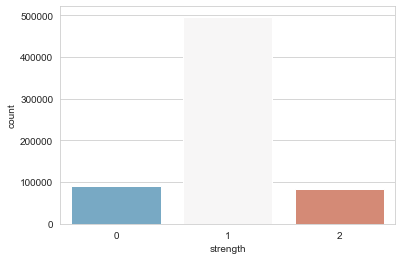

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data,palette='RdBu_r')

In [0]:
data.shape

(669639, 2)

In [0]:
X

['kzde5577',
 'kzde5577',
 'kino3434',
 'kzde5577',
 'visi7k1yr',
 'visi7k1yr',
 'lamborghin1',
 'visi7k1yr',
 'v1118714',
 'kino3434',
 'kino3434',
 'kino3434',
 'kzde5577',
 'as326159',
 'lamborghin1',
 'u6c8vhow',
 '52558000aaa',
 'asv5o9yu',
 'kino3434',
 '52558000aaa',
 'visi7k1yr',
 'jytifok873',
 'kzde5577',
 'WUt9IZzE0OQ7PkNE',
 'universe2908',
 'g067057895',
 'asv5o9yu',
 'u6c8vhow',
 'u6c8vhow',
 'WUt9IZzE0OQ7PkNE',
 'v1118714',
 'intel1',
 'sbl571017',
 'asv5o9yu',
 '612035180tok',
 'trabajonet9',
 'jytifok873',
 '612035180tok',
 'go7kew7a2po',
 'v1118714',
 'jytifok873',
 'jerusalem393',
 '612035180tok',
 'jerusalem393',
 'memjan123',
 'visi7k1yr',
 'visi7k1yr',
 'asgaliu11',
 'fk9qi21m',
 'TyWM72UNEex8Q8Y',
 'prisonbreak1',
 'jerusalem393',
 'idofo673',
 'czuodhj972',
 'yqugu927',
 'TyWM72UNEex8Q8Y',
 'TyWM72UNEex8Q8Y',
 'openup12',
 'visi7k1yr',
 'lsdlsd1',
 'kino3434',
 'matiofox08',
 'patri1973',
 '6975038lp',
 'pHyqueDIyNQ8vmhb',
 'khmer100.03278&?><Mnb',
 'khmer100.03

In [0]:
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [0]:

vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X=vectorizer.fit_transform(X)

In [0]:
X.shape

(669639, 124)

In [0]:
vectorizer.vocabulary_

{'k': 56,
 'z': 71,
 'd': 49,
 'e': 50,
 '5': 29,
 '7': 31,
 'i': 54,
 'n': 59,
 'o': 60,
 '3': 27,
 '4': 28,
 'v': 67,
 's': 64,
 '1': 25,
 'y': 70,
 'r': 63,
 'l': 57,
 'a': 46,
 'm': 58,
 'b': 47,
 'g': 52,
 'h': 53,
 '8': 32,
 '2': 26,
 '6': 30,
 '9': 33,
 'u': 66,
 'c': 48,
 'w': 68,
 '0': 24,
 'j': 55,
 't': 65,
 'f': 51,
 'q': 62,
 'p': 61,
 'x': 69,
 '.': 22,
 '&': 16,
 '?': 38,
 '>': 37,
 '<': 35,
 '@': 39,
 '-': 21,
 '!': 11,
 '_': 44,
 '±': 83,
 '%': 15,
 '(': 17,
 ')': 18,
 '/': 23,
 ' ': 10,
 '#': 13,
 '$': 14,
 '^': 43,
 ';': 34,
 'ú': 112,
 'þ': 116,
 'ó': 106,
 '"': 12,
 '~': 75,
 '+': 20,
 '\\': 41,
 '[': 40,
 ']': 42,
 'ô': 107,
 '=': 36,
 '*': 19,
 '³': 85,
 '{': 72,
 '\x16': 5,
 'ò': 105,
 '·': 88,
 '\x1e': 9,
 '}': 74,
 'å': 97,
 '‚': 119,
 '¿': 91,
 'ä': 96,
 'ð': 103,
 'â': 95,
 '\x1c': 8,
 'ß': 92,
 'ÿ': 117,
 '´': 86,
 '\x08': 1,
 'ê': 99,
 'á': 94,
 '¾': 90,
 '`': 45,
 '|': 73,
 '\x19': 7,
 '¡': 79,
 '«': 81,
 'õ': 108,
 '°': 82,
 'º': 89,
 '÷': 110,
 'ü': 114

In [0]:
X

<669639x122 sparse matrix of type '<class 'numpy.float64'>'
	with 5644639 stored elements in Compressed Sparse Row format>

In [0]:
data.iloc[0,0]

'kzde5577'

In [0]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.591541
5,0.566859
z,0.336098
k,0.291701
d,0.285913
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


Spiltting our data into test and train data sets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting


Training our Model

In [0]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
print(log_class.score(X_test,y_test))

0.8115106624454931


In [0]:
## Multinomial

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.8172450869123709


# Lets see how our model interprets a random password

In [0]:
X_predict=np.array(["%@123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[2]
